In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
aapl = pd.read_csv('AAPL_CLOSE.csv',index_col='Date',parse_dates=True)
#ibm = pd.read_csv('IBM_CLOSE.csv',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE.csv',index_col='Date',parse_dates=True)
goog = pd.read_csv('GOOG_CLOSE.csv',index_col='Date',parse_dates=True)
tesla = pd.read_csv('TSLA_CLOSE.csv',index_col='Date',parse_dates=True)
#To read the csv file then use the date column as a datetime index

In [73]:
stocks = pd.concat([aapl,amzn,goog,tesla],axis=1)
stocks.columns = ['aapl','amzn','goog','tesla']
#This will concatenate, join all dataset together into one with the date as the same

In [74]:
stocks.head()

,aapl,amzn,goog,tesla
Date,,,,
2021-02-01,133.318130,3342.879883,1901.349976,839.809998
2021-02-02,134.162918,3380.000000,1927.510010,872.789978
2021-02-03,133.119339,3312.530029,2070.070068,854.690002
2021-02-04,136.548203,3331.000000,2062.370117,849.989990
2021-02-05,136.125168,3352.149902,2098.000000,852.229980


In [75]:
stocks.pct_change(1).mean()
#This is the mean daily return of each stock over the period of 1 yr dataset i have

aapl     0.001097
amzn    -0.000473
goog     0.001453
tesla    0.000655
dtype: float64

In [76]:
stocks.pct_change(1).corr()
#This is percent change of the correlation return of the stocks to each other

,aapl,amzn,goog,tesla
aapl,1.000000,0.603343,0.577533,0.457426
amzn,0.603343,1.000000,0.576525,0.346700
goog,0.577533,0.576525,1.000000,0.306136
tesla,0.457426,0.346700,0.306136,1.000000


In [77]:
#Log returns is better than arthimetric returns cuz most data require D-trending or normalizing the time series data
stocks.pct_change(1).head()
#The first row is not available because it is used to get the daily percent change,so first day is none

,aapl,amzn,goog,tesla
Date,,,,
2021-02-01,NaN,NaN,NaN,NaN
2021-02-02,0.006337,0.011104,0.013759,0.039271
2021-02-03,-0.007778,-0.019962,0.073961,-0.020738
2021-02-04,0.025758,0.005576,-0.003720,-0.005499
2021-02-05,-0.003098,0.006349,0.017276,0.002635


In [78]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()
#This is the log of stocks divivded by the stock of one day later, shift 1

,aapl,amzn,goog,tesla
Date,,,,
2021-02-01,NaN,NaN,NaN,NaN
2021-02-02,0.006317,0.011043,0.013665,0.038519
2021-02-03,-0.007809,-0.020163,0.071353,-0.020956
2021-02-04,0.025432,0.005560,-0.003727,-0.005514
2021-02-05,-0.003103,0.006329,0.017129,0.002632


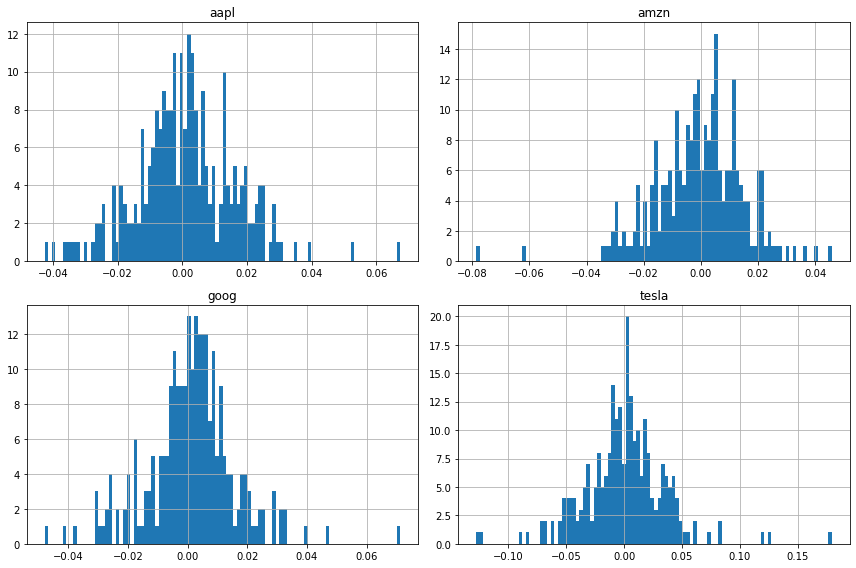

In [79]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [80]:
#This is the average or mean return, logrithmically speaking
log_ret.mean()

aapl     0.000976
amzn    -0.000594
goog     0.001346
tesla    0.000031
dtype: float64

In [81]:
log_ret.cov()
#This is the covalence of the returns, logrithmically

,aapl,amzn,goog,tesla
aapl,0.000241,0.000146,0.000132,0.000252
amzn,0.000146,0.000244,0.000132,0.000191
goog,0.000132,0.000132,0.000213,0.000161
tesla,0.000252,0.000191,0.000161,0.001248


In [82]:
log_ret.cov() * 252
#This is the covalence of the returns, logrithmically times the business days in a year (252)

,aapl,amzn,goog,tesla
aapl,0.060759,0.036760,0.033289,0.063503
amzn,0.036760,0.061369,0.033284,0.048073
goog,0.033289,0.033284,0.053592,0.040629
tesla,0.063503,0.048073,0.040629,0.314411


In [83]:
np.random.seed(101)#This is so the random weights are the same everytime, (101) can be any number
#make sure they are in the same cell as the random number array
print(stocks.columns)#Show the stock columns
weights = np.array(np.random.random(4))#Give the 4 stocks random weights, this is the allocation for each stock
print("Weights:")
weights = weights/np.sum(weights)#This makes sure the total of the 4 random weight/allocation is equal to 1, Its also a normalization technique
print(weights)

#Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
#take log returns, take the average of them multiply them by weights and multiply that by 252
print(exp_ret)

#np.sum(log_ret.mean() * weights * 252)
#sum of (Taking the average log returns * weights * 252 trading days in a year)

#Expected Variance/Volatility, its the denominator of the sharpe ratio formula
print('Expected volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights))) #this is a linear algebra
#Taking the dot product of the covariant of the log return times 252 with the weights, just the dot product of all that multiplied by the transpose weight
#Then take the dot product of that and find the square root of that, which gives you the expected volatility
#lINEAR ALGEBRA IS FASTER  BUT MORE COMPLEX
print(exp_vol)

#Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'amzn', 'goog', 'tesla'], dtype='object')
Weights:
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.04082015895337317
Expected volatility
0.23343178817486632
Sharpe Ratio
0.17486975219842096


In [84]:
np.random.seed(101)

num_ports = 5000 #This is the number of positions/portfolios to run, reduce if computer is slower
all_weights = np.zeros((num_ports,len(stocks.columns))) #An array to hold all weights, This is used instead of the number 5 cuz we dont know the number of stocks
ret_arr = np.zeros(num_ports)#An array to hold the returns
vol_arr = np.zeros(num_ports)#An array to hold the volatility
sharpe_arr = np.zeros(num_ports)#An array to hold the sharpe ratio

for ind in range(num_ports):#for loop for the portfolio sharpe ratio-ing

    #Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    #Save weights
    all_weights[ind,:] = weights #Variable for all weights we just made and index ind

    #Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)#Get return array of index ind equal to the sum log equation.....

    #Expected Variance/Volatility, its the denominator of the sharpe ratio formula
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))# Changed this too, instead of saving to just a single variable

    #Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [85]:
sharpe_arr.max() #This is the optimal allocation sharpe ratio of the 5000 different allocations

1.3625342442720576

In [86]:
sharpe_arr.argmax()# The location of the op sharpe ratio

923

In [87]:
all_weights[923,:] # The weights allocation of the op SR

array([0.19870074, 0.05192874, 0.73893658, 0.01043394])

In [88]:
max_sr_vol = vol_arr[923]
max_sr_ret = ret_arr[923]

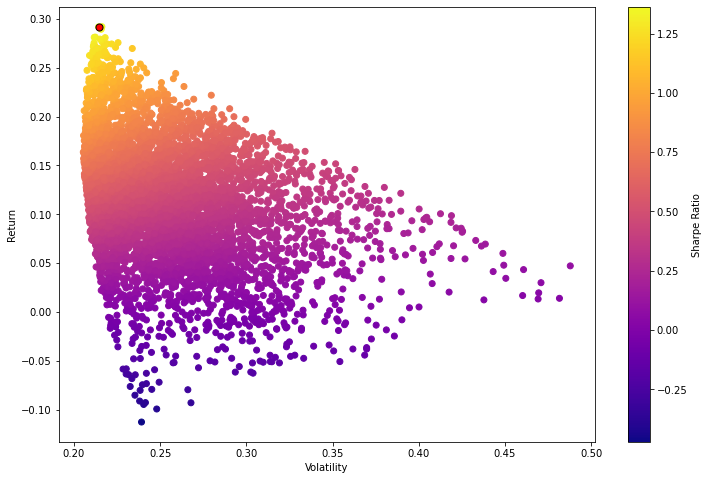

In [89]:
#The chart showing a bullet shape is important, means you're on the right track
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')#Volatility by returns color is sharpe ration cmap is plamsa
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')#this is to bring out the max SR big dot like

In [90]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)#As an array instead of a list, incase we didnt do it before
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

#Basically all of before code but as a function in one now

In [91]:
from scipy.optimize import minimize
#Using scipy's minimizing func

In [92]:
#for the scipy mini abilities to work you need some helper funcs like this
def neg_sharpe(weights): #negative sharpe weights
    return get_ret_vol_sr(weights)[2] * -1 #In the np.array([ret,vol,sr]), sr is the index 2, number 2, (0,1,2) and times -1 since its the negative sharpe ratio we want to minimize
#This func will just take in some weight allocations and return the negative sharpe ratio

In [93]:
#Next is constraints, with constraints we have less things to check
#First up is check sum, our allocations all have to add up to 1
#Returns 0 if the sum of the weights is 1 and if not then it returns how far it is from it

def check_sum(weights):
    return np.sum(weights) - 1

In [94]:
#Since we have just one single constraints, I'm creating a variable cons, its a tuple with a dict in it
cons = ({'type':'eq','fun':check_sum})#Type of constraint is equation n function is check_sum, for correct condition is returning 0


In [95]:
#Bounds/Boundaries is tuple of tuples, since sum is equal to 1, the weights themselves are btw 0 and 1
bounds = ((0,1),(0,1),(0,1),(0,1))

In [96]:
#initial guess func, just any numbers, a list too not tuple
init_guess = [0.25, 0.25, 0.25, 0.25]

In [97]:
#Now putting all these in the minimization func, Optimize results
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
#First argument is actual func(neg_sharpe), next is first x value(here our init guesses), next method there are diff solver method we'd use SLSQP, next is bounds then constraints

In [98]:
opt_results

     fun: -1.4761098770283136
     jac: array([ 8.55177641e-05,  1.69137719e+00, -1.30087137e-05,  1.27797192e+00])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.31984307e-01, 8.30943387e-15, 8.68015693e-01, 3.34736579e-15])

In [99]:
get_ret_vol_sr(opt_results.x) #This get the return, volatility and sharpe ratio of the 5 allocation

array([0.32696761, 0.22150628, 1.47610988])

In [100]:
#Now we'd check all opt portfolios, called efficient frontier,highest level of returns for a defined level of risk, or lowest risk possible for a given level of expected return
#Basically, the best y value for each x value
frontier_y = np.linspace(0,0.3,100)#0 to 0.3 is the lowest to largest that it already plotted in the former graph, 100 is the number of points, you can reduce if too slow on ur pc


In [101]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1] #[1] for index of volatility is one returns is 0 and sr is 2, x is volatility so we're using it

In [102]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},{'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]*possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])
    
#We used lamda to get the returns of weights times possible returns
#Then the same minimize funct and append(add) that result to the front volatility

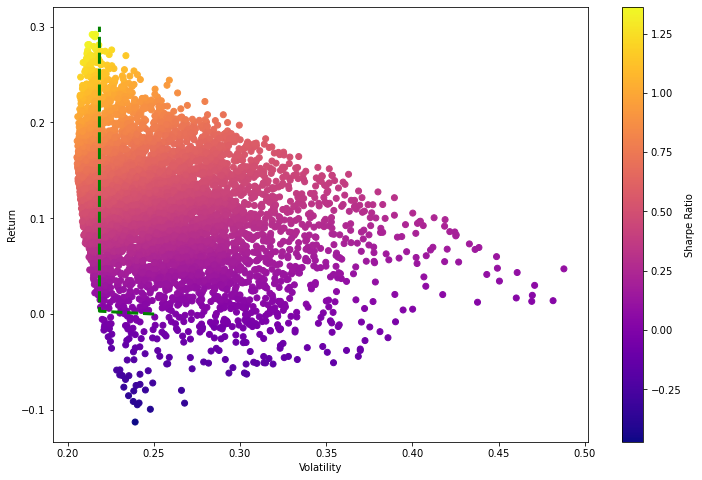

In [103]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')#Volatility by returns color is sharpe ration cmap is plamsa
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)